In [1]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:

import os

import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Concatenate
from keras.models import Sequential
import keras
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, BatchNormalization, Activation
from keras.models import Model
import matplotlib.image as mpimg
from glob import glob
from keras.layers.convolutional import Conv2DTranspose
from keras.layers import concatenate
import struct


Using TensorFlow backend.


In [0]:
# print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/train')))
# print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/train')))
# # 3600
# # 3600

3600
3600


In [0]:
# print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/test/')))
# print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/test/')))
# # 354
# # 354

354
354


In [0]:
# ndct = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/train/*'))
# ldct = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/train/*'))

# ndct_test = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/test/*'))
# ldct_test = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/test/*'))

# print(len(ndct))
# print(len(ldct))
# print(len(ndct_test))
# print(len(ldct_test))

3600
3600
354
354


In [0]:
def cal_psnr(im1, im2):
    # assert pixel value range is 0-255 and type is uint8
    mse = ((im1.astype(np.float) - im2.astype(np.float)) ** 2).mean()
    maxval = np.amax(im1)
    psnr = 10 * np.log10(maxval ** 2 / mse)
    return psnr

def tf_psnr(im1, im2):
    # assert pixel value range is 0-1
    #mse = tf.losses.mean_squared_error(labels=im2 * 255.0, predictions=im1 * 255.0)
    mse = tf.compat.v1.losses.mean_squared_error(labels=im2 * 255.0, predictions=im1 * 255.0)
    return 10.0 * (tf.log(255.0 ** 2 / mse) / tf.log(10.0))

In [0]:
# ndct_imgs_train = []
# for i in range(0, len(ndct)):                                                                                                                                      
# #for i in range(0, 1600):
#     f = open(ndct[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ndct_imgs_train.append(a)
#     f.close()
# print("len(ndct_imgs_train)....: ",len(ndct_imgs_train))
                                                                                                                                                         

len(ndct_imgs_train)....:  3600


In [0]:
# ldct_imgs_train = []
# for i in range(0, len(ldct)):
# #for i in range(0, 1600):
#     f = open(ldct[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ldct_imgs_train.append(a)
#     f.close()
# print("len(ldct_imgs_train)....: ",len(ldct_imgs_train))

len(ldct_imgs_train)....:  3600


In [0]:
# ndct_imgs_test = []
# for i in range(0, len(ndct_test)):
# #for i in range(0, 10):
#     f = open(ndct_test[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ndct_imgs_test.append(a)
#     f.close()
# print("len(ndct_imgs_test)....: ",len(ndct_imgs_test))


len(ndct_imgs_test)....:  354


In [0]:
# # load the image
# ldct_imgs_test = []
# for i in range(0, len(ldct_test)):
# #for i in range(0, 10):
#     f = open(ldct_test[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ldct_imgs_test.append(a)
#     f.close()
# print("len(ldct_imgs_test)....: ",len(ldct_imgs_test))


len(ldct_imgs_test)....:  354


In [0]:
# ldct_train = np.asarray(ldct_imgs_train)
# ndct_train = np.asarray(ndct_imgs_train)

# ldct_train = ldct_train.reshape(3600,512,512,1)
# ndct_train = ndct_train.reshape(3600,512,512,1)

# ldct_test = np.asarray(ldct_imgs_test)
# ndct_test = np.asarray(ndct_imgs_test)

# ldct_test = ldct_test.reshape(len(ldct_imgs_test),512,512,1)
# ndct_test = ndct_test.reshape(len(ldct_imgs_test),512,512,1)

# print(ldct_train.shape)
# print(ndct_train.shape)
# print(ldct_test.shape)
# print(ndct_test.shape)


(3600, 512, 512, 1)
(3600, 512, 512, 1)
(354, 512, 512, 1)
(354, 512, 512, 1)


In [0]:
# np.save('sparseview_60_train', ldct_train) # save the file as "sparseview_60_train.npy" 
# np.save('ndct_train', ndct_train) # save the file as "ndct_train.npy" 

# np.save('sparseview_60_test', ldct_test) # save the file as "sparseview_60_test.npy" 
# np.save('ndct_test', ndct_test) # save the file as "ndct_test.npy" 


In [0]:
sparseview_60_train = np.load('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/sparseview_60_train.npy') # loads saved array into variable sparseview_60_train.
ndct_train = np.load('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/ndct_train.npy') # loads saved array into variable ndct_train.
sparseview_60_test = np.load('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/sparseview_60_test.npy') # loads saved array into variable sparseview_60_test.
ndct_test = np.load('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/ndct_test.npy') # loads saved array into variable ndct_test.

# sparseview_60_train = np.load('sparseview_60_train.npy') # loads saved array into variable sparseview_60_train.
# ndct_train = np.load('ndct_train.npy') # loads saved array into variable ndct_train.
# sparseview_60_test = np.load('sparseview_60_test.npy') # loads saved array into variable sparseview_60_test.
# ndct_test = np.load('ndct_test.npy') # loads saved array into variable ndct_test.


In [0]:
# class LossHistory(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.losses = []

#     def on_batch_end(self, batch, logs={}):
#         self.losses.append(logs.get('loss'))
# history = LossHistory()

In [0]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=4,
                              verbose=0, mode='auto')

Basic UNet model

In [0]:
inputs = Input((None, None,1))

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (inputs)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)


c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (c5)
p5 = MaxPooling2D(pool_size=(2, 2)) (c5)

c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (p5)
c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (c55)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c55)
u6 = concatenate([u6, c5])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)


u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1])
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

output_img = Conv2D(1, (1, 1)) (c9)
subtracted = keras.layers.Subtract()([inputs, output_img])


model = Model(inputs=[inputs], outputs=[subtracted])
model.compile(optimizer='adam', loss='mse', metrics=[tf_psnr])



In [11]:
history = model.fit(sparseview_60_train, ndct_train, validation_split=0.05, batch_size=30, epochs=50, callbacks =[es])


Train on 3420 samples, validate on 180 samples
Epoch 1/50
3420/3420 [==============================] - 131s 38ms/step - loss: 6.3313e-04 - tf_psnr: 32.0223 - val_loss: 3.9764e-04 - val_tf_psnr: 34.0120
Epoch 2/50
3420/3420 [==============================] - 130s 38ms/step - loss: 4.7142e-04 - tf_psnr: 33.2867 - val_loss: 3.2876e-04 - val_tf_psnr: 34.8441
Epoch 3/50
3420/3420 [==============================] - 130s 38ms/step - loss: 3.6361e-04 - tf_psnr: 34.4058 - val_loss: 2.7292e-04 - val_tf_psnr: 35.6679
Epoch 4/50
3420/3420 [==============================] - 131s 38ms/step - loss: 3.0385e-04 - tf_psnr: 35.1831 - val_loss: 2.4049e-04 - val_tf_psnr: 36.2419
Epoch 5/50
3420/3420 [==============================] - 131s 38ms/step - loss: 2.6557e-04 - tf_psnr: 35.7686 - val_loss: 2.2323e-04 - val_tf_psnr: 36.5568
Epoch 6/50
3420/3420 [==============================] - 131s 38ms/step - loss: 2.4573e-04 - tf_psnr: 36.1059 - val_loss: 2.0972e-04 - val_tf_psnr: 36.8239
Epoch 7/50
3420/3420 [=

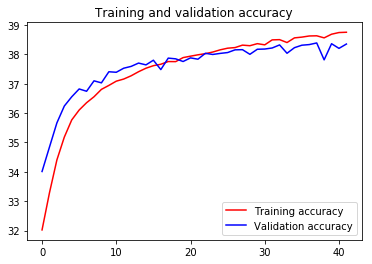

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['tf_psnr']
val_acc = history.history['val_tf_psnr']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [16]:
reconstructed = model.predict(sparseview_60_test)
psnr = cal_psnr(ndct_test, reconstructed)
print("psnr 10 epochs.....",psnr)

psnr 10 epochs..... 37.74037465320515


In [0]:
from PIL import Image

a = reconstructed[0].reshape(512, 512)
scalef = np.amax(a)
a = np.clip(255 * a/scalef, 0, 255).astype('uint8')
#result = Image.fromarray((a * 255).astype(np.uint8))                                                                                                
result = Image.fromarray((a).astype(np.uint8))
result.save('unet_0_300.png')
result.save('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/unet_0_50.png')

a = reconstructed[12].reshape(512, 512)
scalef = np.amax(a)
a = np.clip(255 * a/scalef, 0, 255).astype('uint8')
#result = Image.fromarray((a * 255).astype(np.uint8))                                                                                                
result = Image.fromarray((a).astype(np.uint8))
result.save('unet_12_300.png')
result.save('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/unet_12_50.png')

In [19]:
history = model.fit(sparseview_60_train, ndct_train, validation_split=0.05, batch_size=30, epochs=50, callbacks =[es])


Train on 3420 samples, validate on 180 samples
Epoch 1/50
3420/3420 [==============================] - 131s 38ms/step - loss: 1.3219e-04 - tf_psnr: 38.7948 - val_loss: 1.4702e-04 - val_tf_psnr: 38.3846
Epoch 2/50
3420/3420 [==============================] - 130s 38ms/step - loss: 1.3233e-04 - tf_psnr: 38.7907 - val_loss: 1.4722e-04 - val_tf_psnr: 38.3813
Epoch 3/50
3420/3420 [==============================] - 130s 38ms/step - loss: 1.3014e-04 - tf_psnr: 38.8624 - val_loss: 1.4669e-04 - val_tf_psnr: 38.3842
Epoch 4/50
3420/3420 [==============================] - 130s 38ms/step - loss: 1.2996e-04 - tf_psnr: 38.8693 - val_loss: 1.4535e-04 - val_tf_psnr: 38.4276
Epoch 5/50
3420/3420 [==============================] - 131s 38ms/step - loss: 1.3042e-04 - tf_psnr: 38.8550 - val_loss: 1.4641e-04 - val_tf_psnr: 38.3960
Epoch 6/50
3420/3420 [==============================] - 131s 38ms/step - loss: 1.2848e-04 - tf_psnr: 38.9169 - val_loss: 1.4400e-04 - val_tf_psnr: 38.4712
Epoch 7/50
3420/3420 [=

In [20]:
reconstructed = model.predict(sparseview_60_test)
psnr = cal_psnr(ndct_test, reconstructed)
print("psnr 10 epochs.....",psnr)

psnr 10 epochs..... 37.38823476838129


In [0]:
model.save_weights("model.h5")

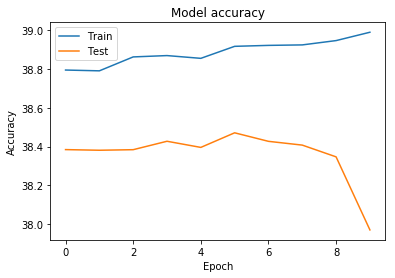

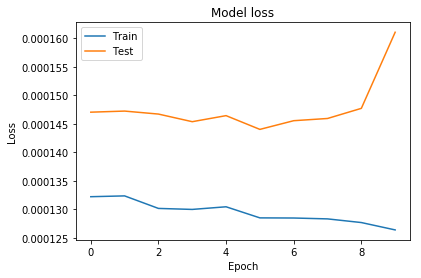

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['tf_psnr'])
plt.plot(history.history['val_tf_psnr'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

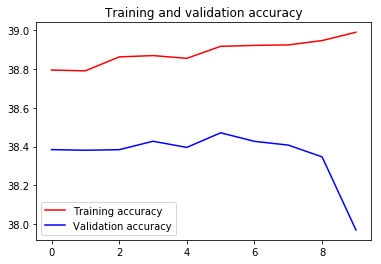

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
acc = history.history['tf_psnr']
val_acc = history.history['val_tf_psnr']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [29]:
reconstructed = model.predict(sparseview_60_test)
psnr = cal_psnr(ndct_test, reconstructed)
print("psnr 10 epochs.....",psnr)

psnr 10 epochs..... 37.38823476838129


In [0]:
from PIL import Image

a = reconstructed[0].reshape(512, 512)
scalef = np.amax(a)
a = np.clip(255 * a/scalef, 0, 255).astype('uint8')
#result = Image.fromarray((a * 255).astype(np.uint8))                                                                                                
result = Image.fromarray((a).astype(np.uint8))
result.save('unet_0_300.png')
result.save('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/unet_0_37.38.png')

a = reconstructed[12].reshape(512, 512)
scalef = np.amax(a)
a = np.clip(255 * a/scalef, 0, 255).astype('uint8')
#result = Image.fromarray((a * 255).astype(np.uint8))                                                                                                
result = Image.fromarray((a).astype(np.uint8))
result.save('unet_12_300.png')
result.save('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/rec_orig_12_37.38.png')